In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('cleaned_aus_all.csv')

In [2]:
# 1. Filter out zero and near-zero values
filtered_rainfall = data[data['Rainfall'] > 1]['Rainfall']

# 2. Calculate the Interquartile Range (IQR)
Q1 = filtered_rainfall.quantile(0.25)
Q3 = filtered_rainfall.quantile(0.75)
IQR = Q3 - Q1

# 3. Determine the threshold using Q3 + 1.5 x IQR
iqr_threshold = Q3 + 1.5 * IQR

# 4. Calculate the 95th percentile on the filtered data
percentile_95_threshold = filtered_rainfall.quantile(0.95)

iqr_threshold, percentile_95_threshold,Q1,Q3,IQR


(23.9, 34.0, 2.4, 11.0, 8.6)

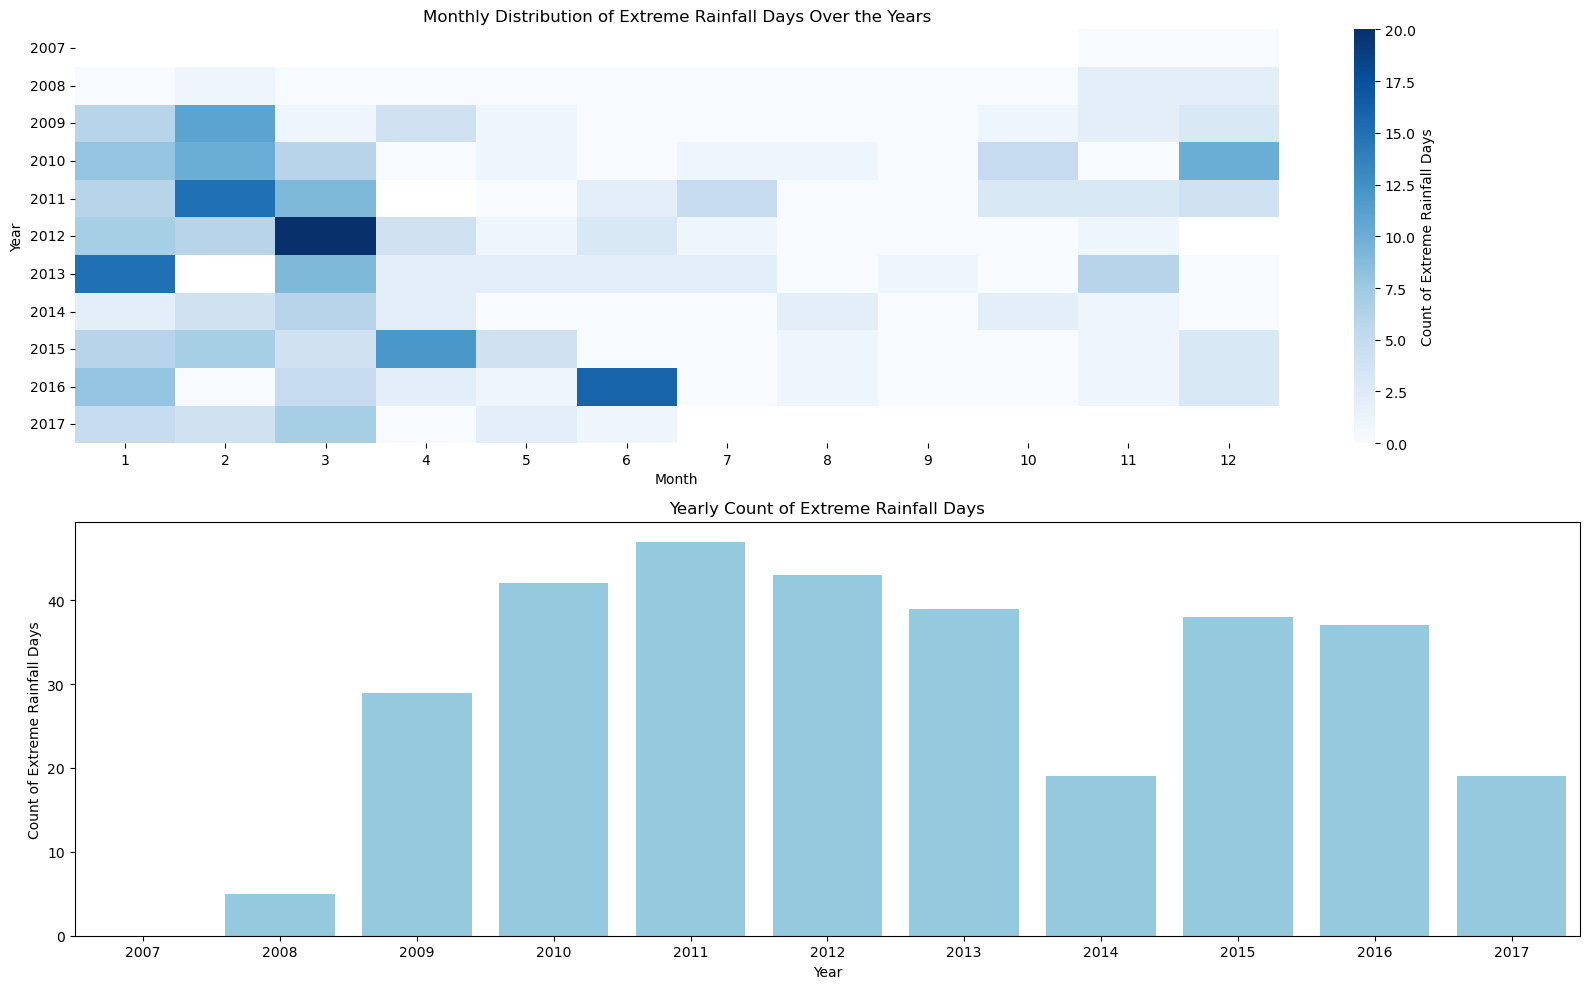

In [67]:

data['ExtremeRainfall'] = data['Rainfall'] > percentile_99_threshold

# 2. Monthly Analysis
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month

# Count the number of extreme rainfall days in each month
monthly_extreme_counts = data.groupby(['Year', 'Month'])['ExtremeRainfall'].sum().reset_index()

# 3. Yearly Analysis
yearly_extreme_counts = data.groupby('Year')['ExtremeRainfall'].sum().reset_index()

# Plotting
heatmap_data = monthly_extreme_counts.pivot_table(index='Year', columns='Month', values='ExtremeRainfall', aggfunc='sum')

fig, ax = plt.subplots(2, 1, figsize=(16, 10))

# 1. Heatmap for Monthly Analysis
sns.heatmap(heatmap_data, cmap='Blues', ax=ax[0], cbar_kws={'label': 'Count of Extreme Rainfall Days'})
ax[0].set_title('Monthly Distribution of Extreme Rainfall Days Over the Years')

# 2. Bar Chart for Yearly Analysis
sns.barplot(x='Year', y='ExtremeRainfall', data=yearly_extreme_counts, ax=ax[1], color='skyblue')
ax[1].set_title('Yearly Count of Extreme Rainfall Days')
ax[1].set_ylabel('Count of Extreme Rainfall Days')

plt.tight_layout()
plt.show()

In [68]:
# 1. Identify Extreme Rainfall Days
data['ExtremeRainfall'] = data['Rainfall'] > percentile_95_threshold

# 2. Monthly Analysis
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month

# Count the number of extreme rainfall days in each month
monthly_extreme_counts = data.groupby(['Year', 'Month'])['ExtremeRainfall'].sum().reset_index()

# 3. Yearly Analysis
yearly_extreme_counts = data.groupby('Year')['ExtremeRainfall'].sum().reset_index()

monthly_extreme_counts, yearly_extreme_counts.head()

(     Year  Month  ExtremeRainfall
 0    2007     11                1
 1    2007     12                0
 2    2008      1                0
 3    2008      2                1
 4    2008      3                0
 ..    ...    ...              ...
 108  2017      2               28
 109  2017      3               47
 110  2017      4               11
 111  2017      5                7
 112  2017      6               18
 
 [113 rows x 3 columns],
    Year  ExtremeRainfall
 0  2007                1
 1  2008               21
 2  2009              166
 3  2010              239
 4  2011              257)

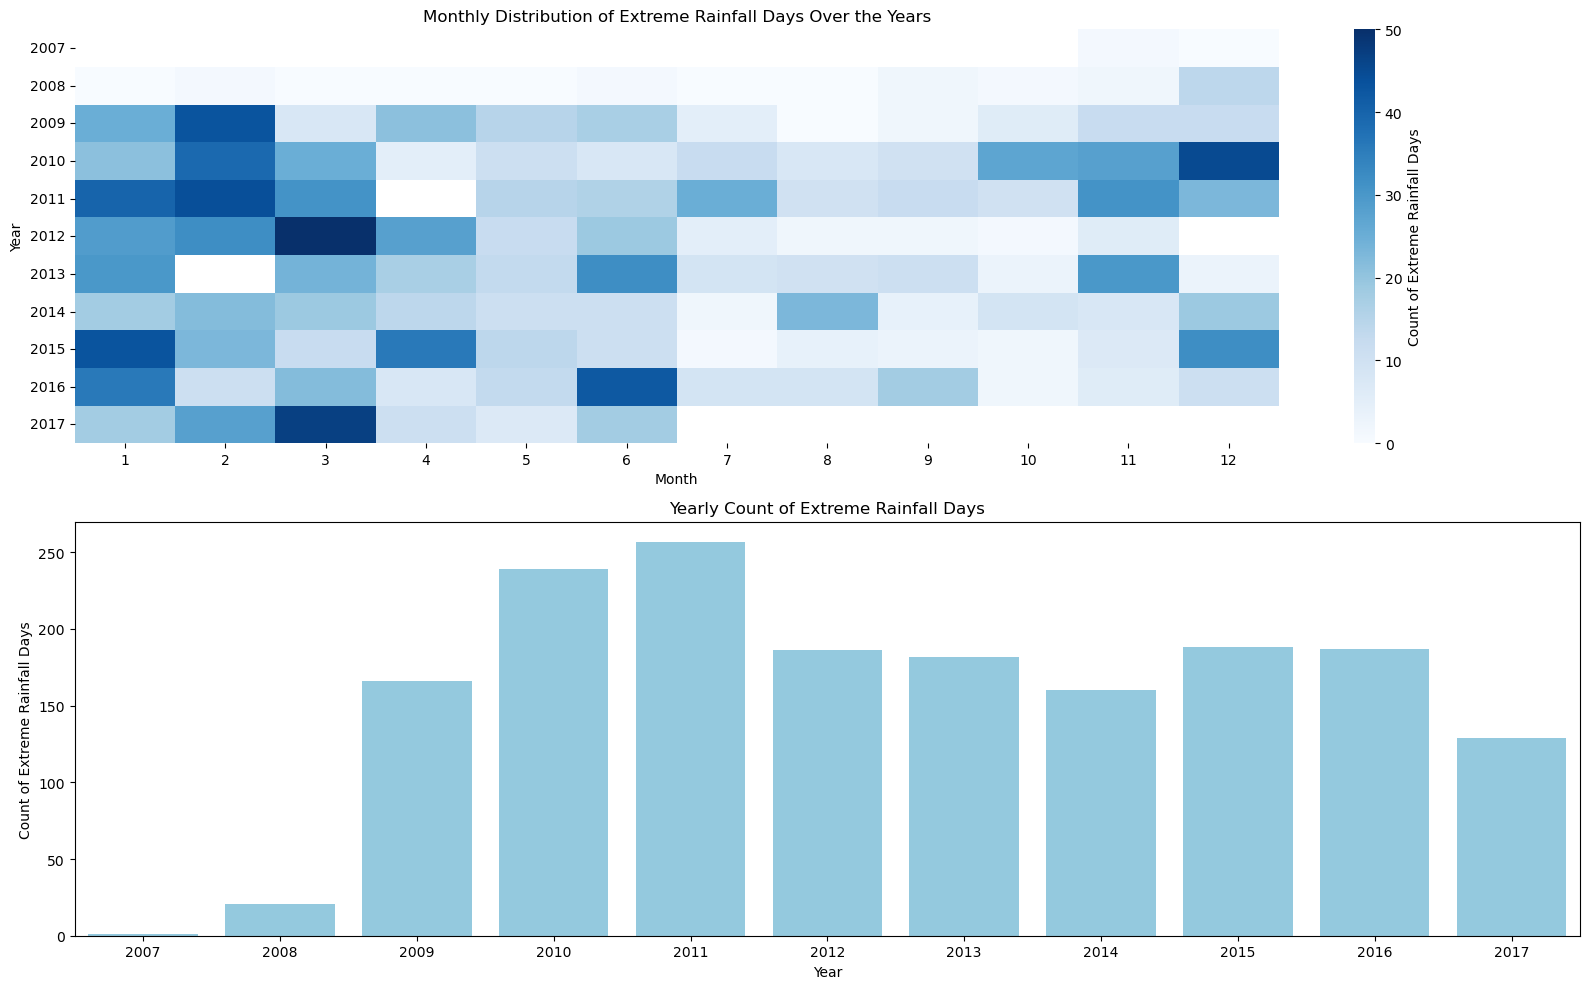

In [69]:
# Use pivot_table for the heatmap
heatmap_data = monthly_extreme_counts.pivot_table(index='Year', columns='Month', values='ExtremeRainfall', aggfunc='sum')

# Set up the plot
fig, ax = plt.subplots(2, 1, figsize=(16, 10))

# 1. Heatmap for Monthly Analysis
sns.heatmap(heatmap_data, cmap='Blues', ax=ax[0], cbar_kws={'label': 'Count of Extreme Rainfall Days'})
ax[0].set_title('Monthly Distribution of Extreme Rainfall Days Over the Years')

# 2. Bar Chart for Yearly Analysis
sns.barplot(x='Year', y='ExtremeRainfall', data=yearly_extreme_counts, ax=ax[1], color='skyblue')
ax[1].set_title('Yearly Count of Extreme Rainfall Days')
ax[1].set_ylabel('Count of Extreme Rainfall Days')

plt.tight_layout()
plt.show()


In [70]:
# Selected regions
selected_regions = ['SYDNEY', 'PERTH', 'CANBERRA', 'ADELAIDE', 'DARWIN', 'HOBART']

# Define a function to compute the thresholds for each city
def compute_thresholds(city_data):
    # 1. Filter out zero and near-zero values
    filtered_rainfall = city_data[city_data['Rainfall'] > 1]['Rainfall']

    # 2. Calculate the Interquartile Range (IQR)
    Q1 = filtered_rainfall.quantile(0.25)
    Q3 = filtered_rainfall.quantile(0.75)
    IQR = Q3 - Q1

    # 3. Determine the threshold using Q3 + 1.5 x IQR
    iqr_threshold = Q3 + 1.5 * IQR

    # 4. Calculate the 95th percentile on the filtered data
    percentile_95_threshold = filtered_rainfall.quantile(0.95)
    
    return iqr_threshold, percentile_95_threshold

# Compute thresholds for each selected city
thresholds = {city: compute_thresholds(data[data['Location'] == city]) for city in selected_regions}
thresholds_df = pd.DataFrame(thresholds, index=['IQR Threshold', '95th Percentile']).transpose()
thresholds_df


,IQR Threshold,95th Percentile
SYDNEY,33.500,44.78
PERTH,25.000,27.16
CANBERRA,23.725,28.21
ADELAIDE,17.000,20.00
DARWIN,50.700,61.80
HOBART,17.000,20.14


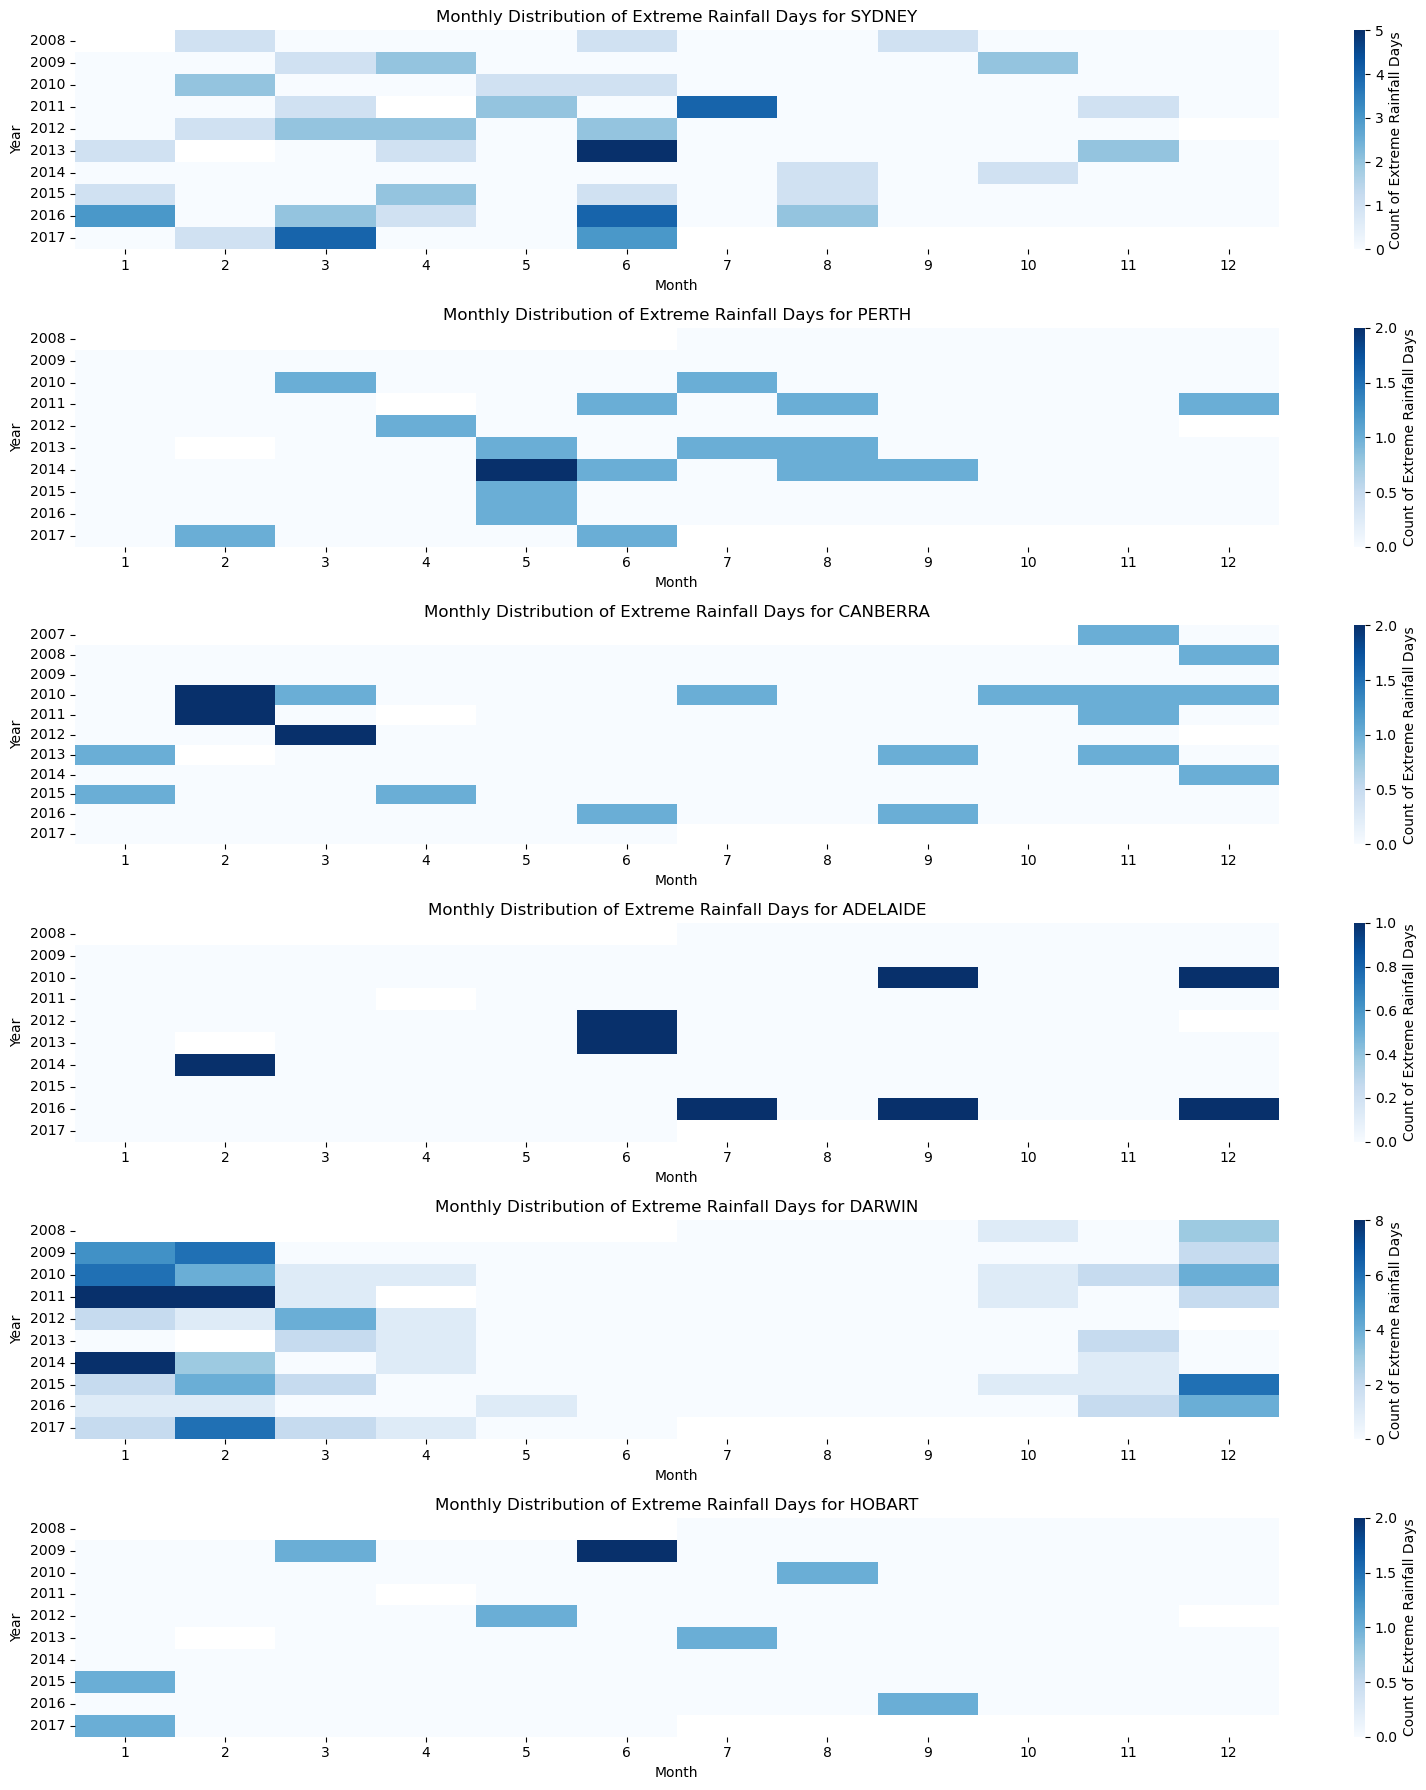

In [71]:

# 1. Filter the data for the selected regions
filtered_data = data[data['Location'].isin(selected_regions)]

# 2. Monthly Analysis for each region
monthly_region_extreme_counts = filtered_data.groupby(['Location', 'Year', 'Month'])['ExtremeRainfall'].sum().reset_index()

# Visualize the results using heatmaps
fig, axs = plt.subplots(len(selected_regions), 1, figsize=(16, 18))

for i, region in enumerate(selected_regions):
    region_data = monthly_region_extreme_counts[monthly_region_extreme_counts['Location'] == region].pivot_table(index='Year', columns='Month', values='ExtremeRainfall', aggfunc='sum')
    sns.heatmap(region_data, cmap='Blues', ax=axs[i], cbar_kws={'label': 'Count of Extreme Rainfall Days'})
    axs[i].set_title(f'Monthly Distribution of Extreme Rainfall Days for {region}')

plt.tight_layout()
plt.show()


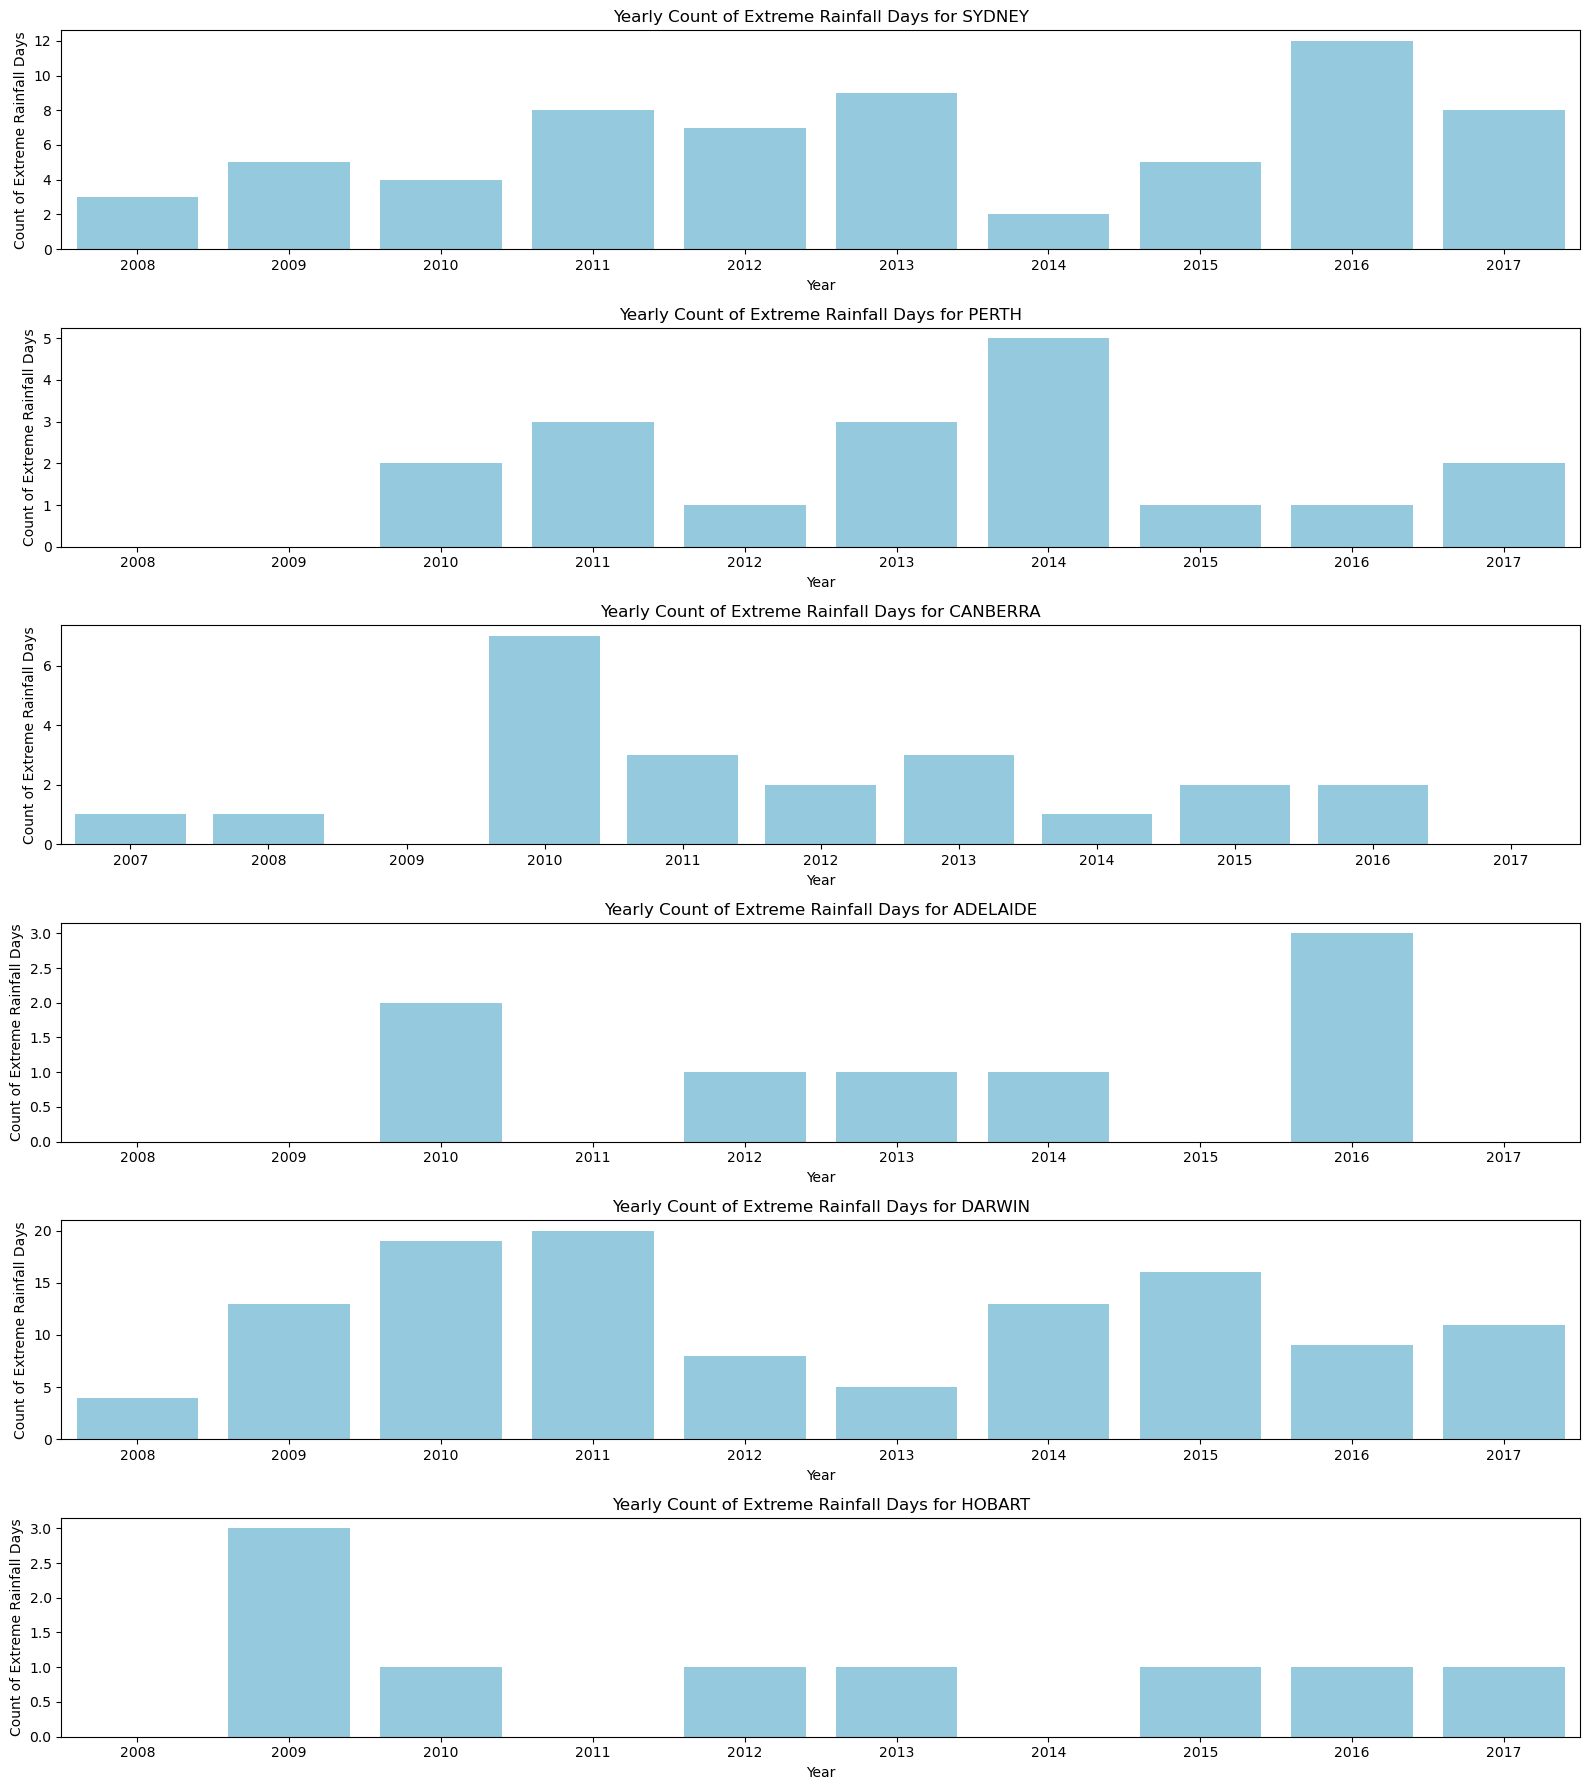

In [72]:
# 3. Yearly Analysis for each region
yearly_region_extreme_counts = filtered_data.groupby(['Location', 'Year'])['ExtremeRainfall'].sum().reset_index()

# Visualize the results using bar charts
fig, axs = plt.subplots(len(selected_regions), 1, figsize=(16, 18))

for i, region in enumerate(selected_regions):
    region_data = yearly_region_extreme_counts[yearly_region_extreme_counts['Location'] == region]
    sns.barplot(x='Year', y='ExtremeRainfall', data=region_data, ax=axs[i], color='skyblue')
    axs[i].set_title(f'Yearly Count of Extreme Rainfall Days for {region}')
    axs[i].set_ylabel('Count of Extreme Rainfall Days')

plt.tight_layout()
plt.show()